In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [ ]:
#import file and reading 10 lines
mf = pd.read_csv('Cricket.csv',encoding = 'unicode_escape')
mf.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16


In [ ]:
#  See no of rows and columns available
mf.shape

(79, 13)

In [ ]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [ ]:
mf.isnull()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,False,False,False,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Get detail info of each datatype
mf.describe(include='all')

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
count,79,79,79.000000,79.000000,79.000000,79.000000,79,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
unique,79,65,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN
top,SP Fleming (ICC/NZ),1992-2003,NaN,NaN,NaN,NaN,119*,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,245.075949,230.544304,30.037975,7618.139241,NaN,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,NaN,NaN,74.211716,70.321022,14.421710,2551.873313,NaN,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,NaN,NaN,128.000000,127.000000,4.000000,5080.000000,NaN,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,NaN,NaN,188.000000,177.000000,17.500000,5759.000000,NaN,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,NaN,NaN,232.000000,217.000000,29.000000,6798.000000,NaN,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,NaN,NaN,281.500000,261.500000,40.000000,8739.500000,NaN,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000


### Data Cleaning

In [ ]:
(mf.isnull().sum() * 100 / len(mf)).value_counts(ascending=False)
mf.isnull().sum().value_counts(ascending=False)
(mf.isnull().sum(axis=1) * 100 / len(mf)).value_counts(ascending=False)
mf.isnull().sum(axis=1).value_counts(ascending=False)

0    79
dtype: int64

In [ ]:
mf_dub = mf.copy()
# Checking for duplicates and dropping the entire duplicate row if any
mf_dub.drop_duplicates(subset=None, inplace=True)

## Data Preparation

In [ ]:
mf.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
## Arrange in high to low performance
mf[['Strt','End']] = mf.Span.str.split("-",expand=True) 
mf[['Strt','End']]=mf[['Strt','End']].astype(int)
mf['Exp']=mf['End']-mf['Strt']
mf=df.drop(['Strt','End','Span'], axis = 1) 
mf.head()

AttributeError: 'DataFrame' object has no attribute 'Span'

## Data Visualization

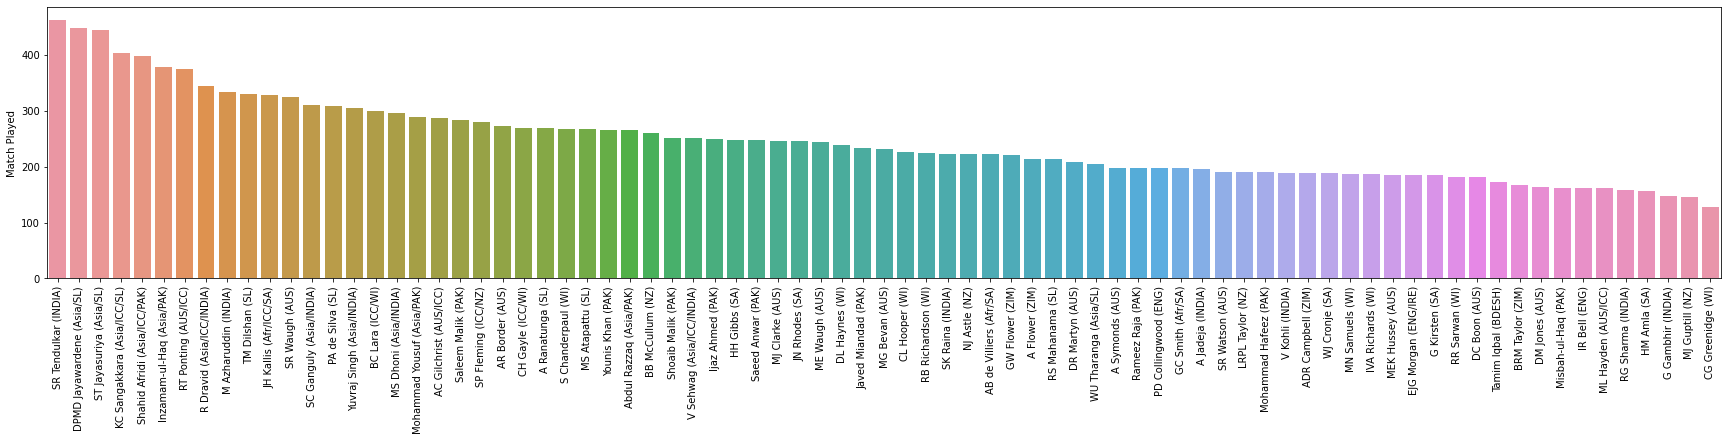

In [ ]:
#Match Played
plt.figure(figsize = (30,5))
mat = mf[['Player','Mat']].sort_values('Mat', ascending = False)
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

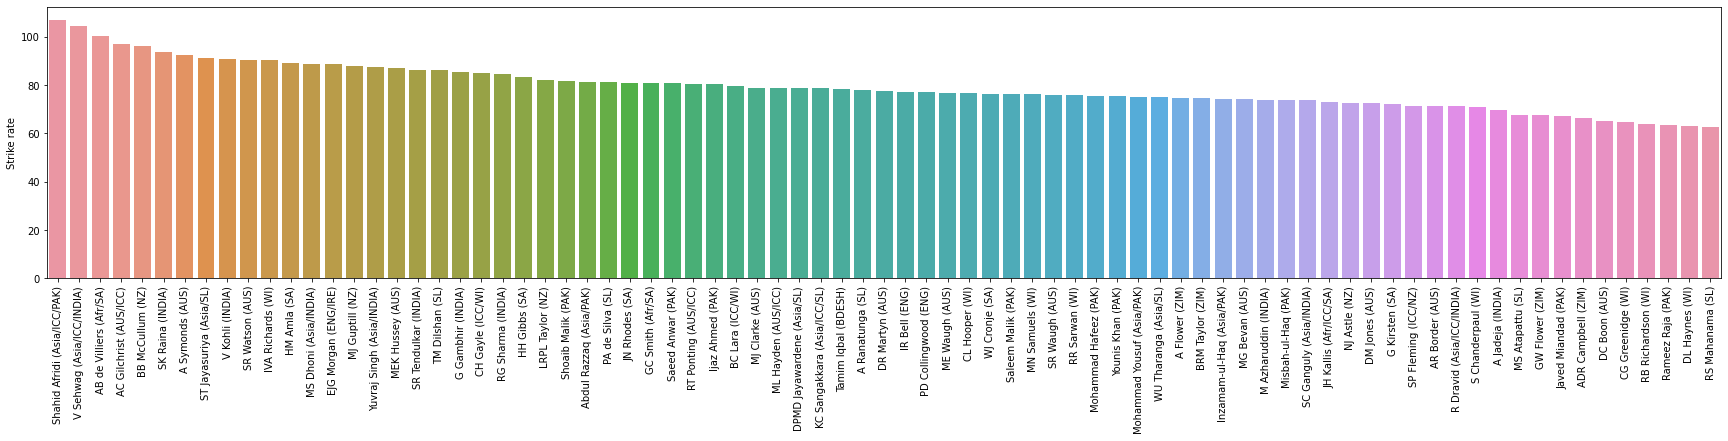

In [ ]:
#Strike Rate 
plt.figure(figsize = (30,5))
mat = mf[['Player','SR']].sort_values('SR', ascending = False)
ax = sns.barplot(x='Player', y='SR', data= mat)
ax.set(xlabel = '', ylabel= 'Strike rate')
plt.xticks(rotation=90)
plt.show()

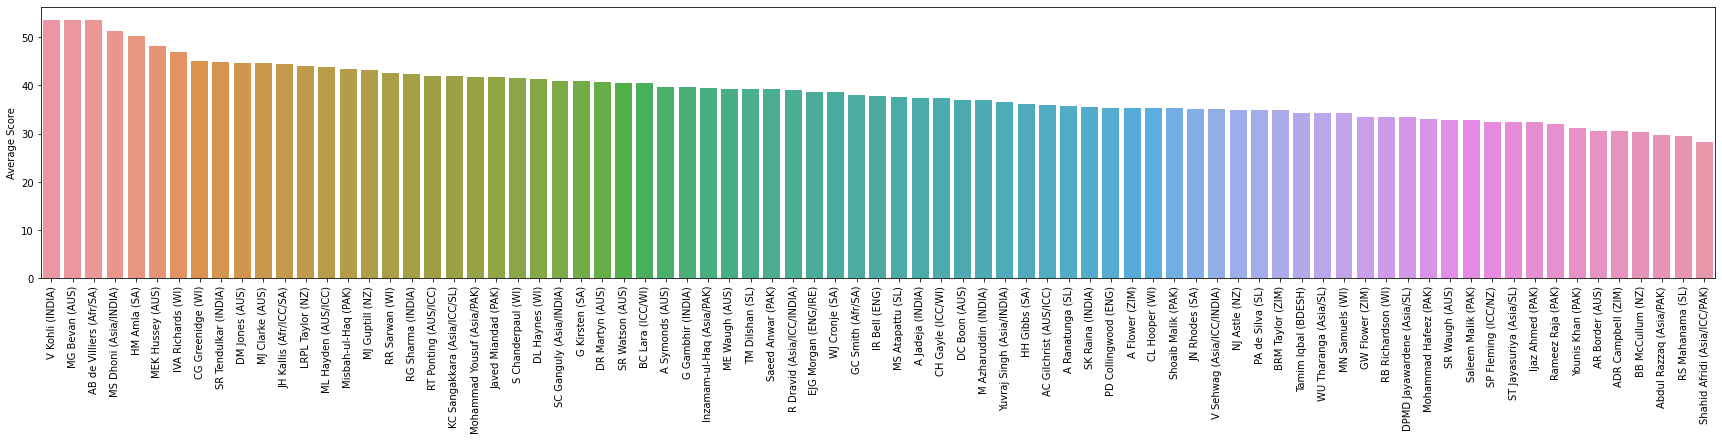

In [ ]:
# Average Score
plt.figure(figsize = (30,5))
mat = mf[['Player','Ave']].sort_values('Ave', ascending = False)
ax = sns.barplot(x='Player', y='Ave', data= mat)
ax.set(xlabel = '', ylabel= 'Average Score')
plt.xticks(rotation=90)
plt.show()

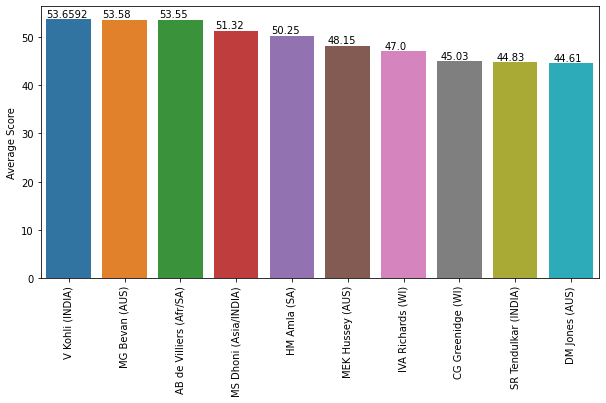

In [ ]:
plt.figure(figsize = (10,5))
avg_top10 = mf[['Player','Ave']].sort_values('Ave', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Ave', data= avg_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Average Score')
plt.xticks(rotation=90)
plt.show()

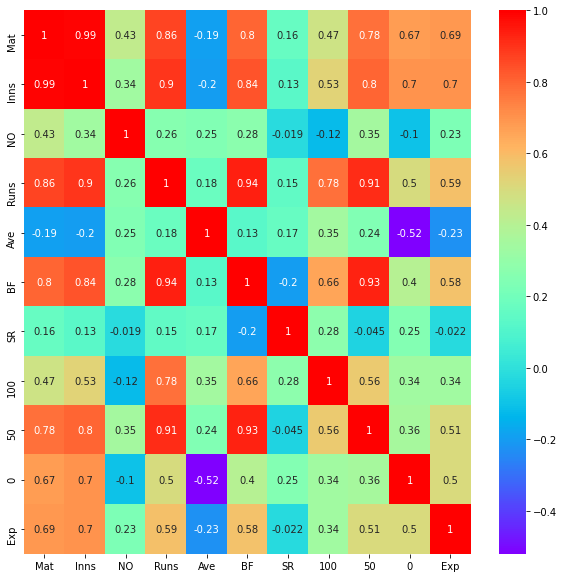

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

* Mat and Inns are highly correlated with correlation of 0.99
* Mat and Runs are highly correlated with correlation of 0.86
* Runs and Inns are highly correlated with correlation of 0.90


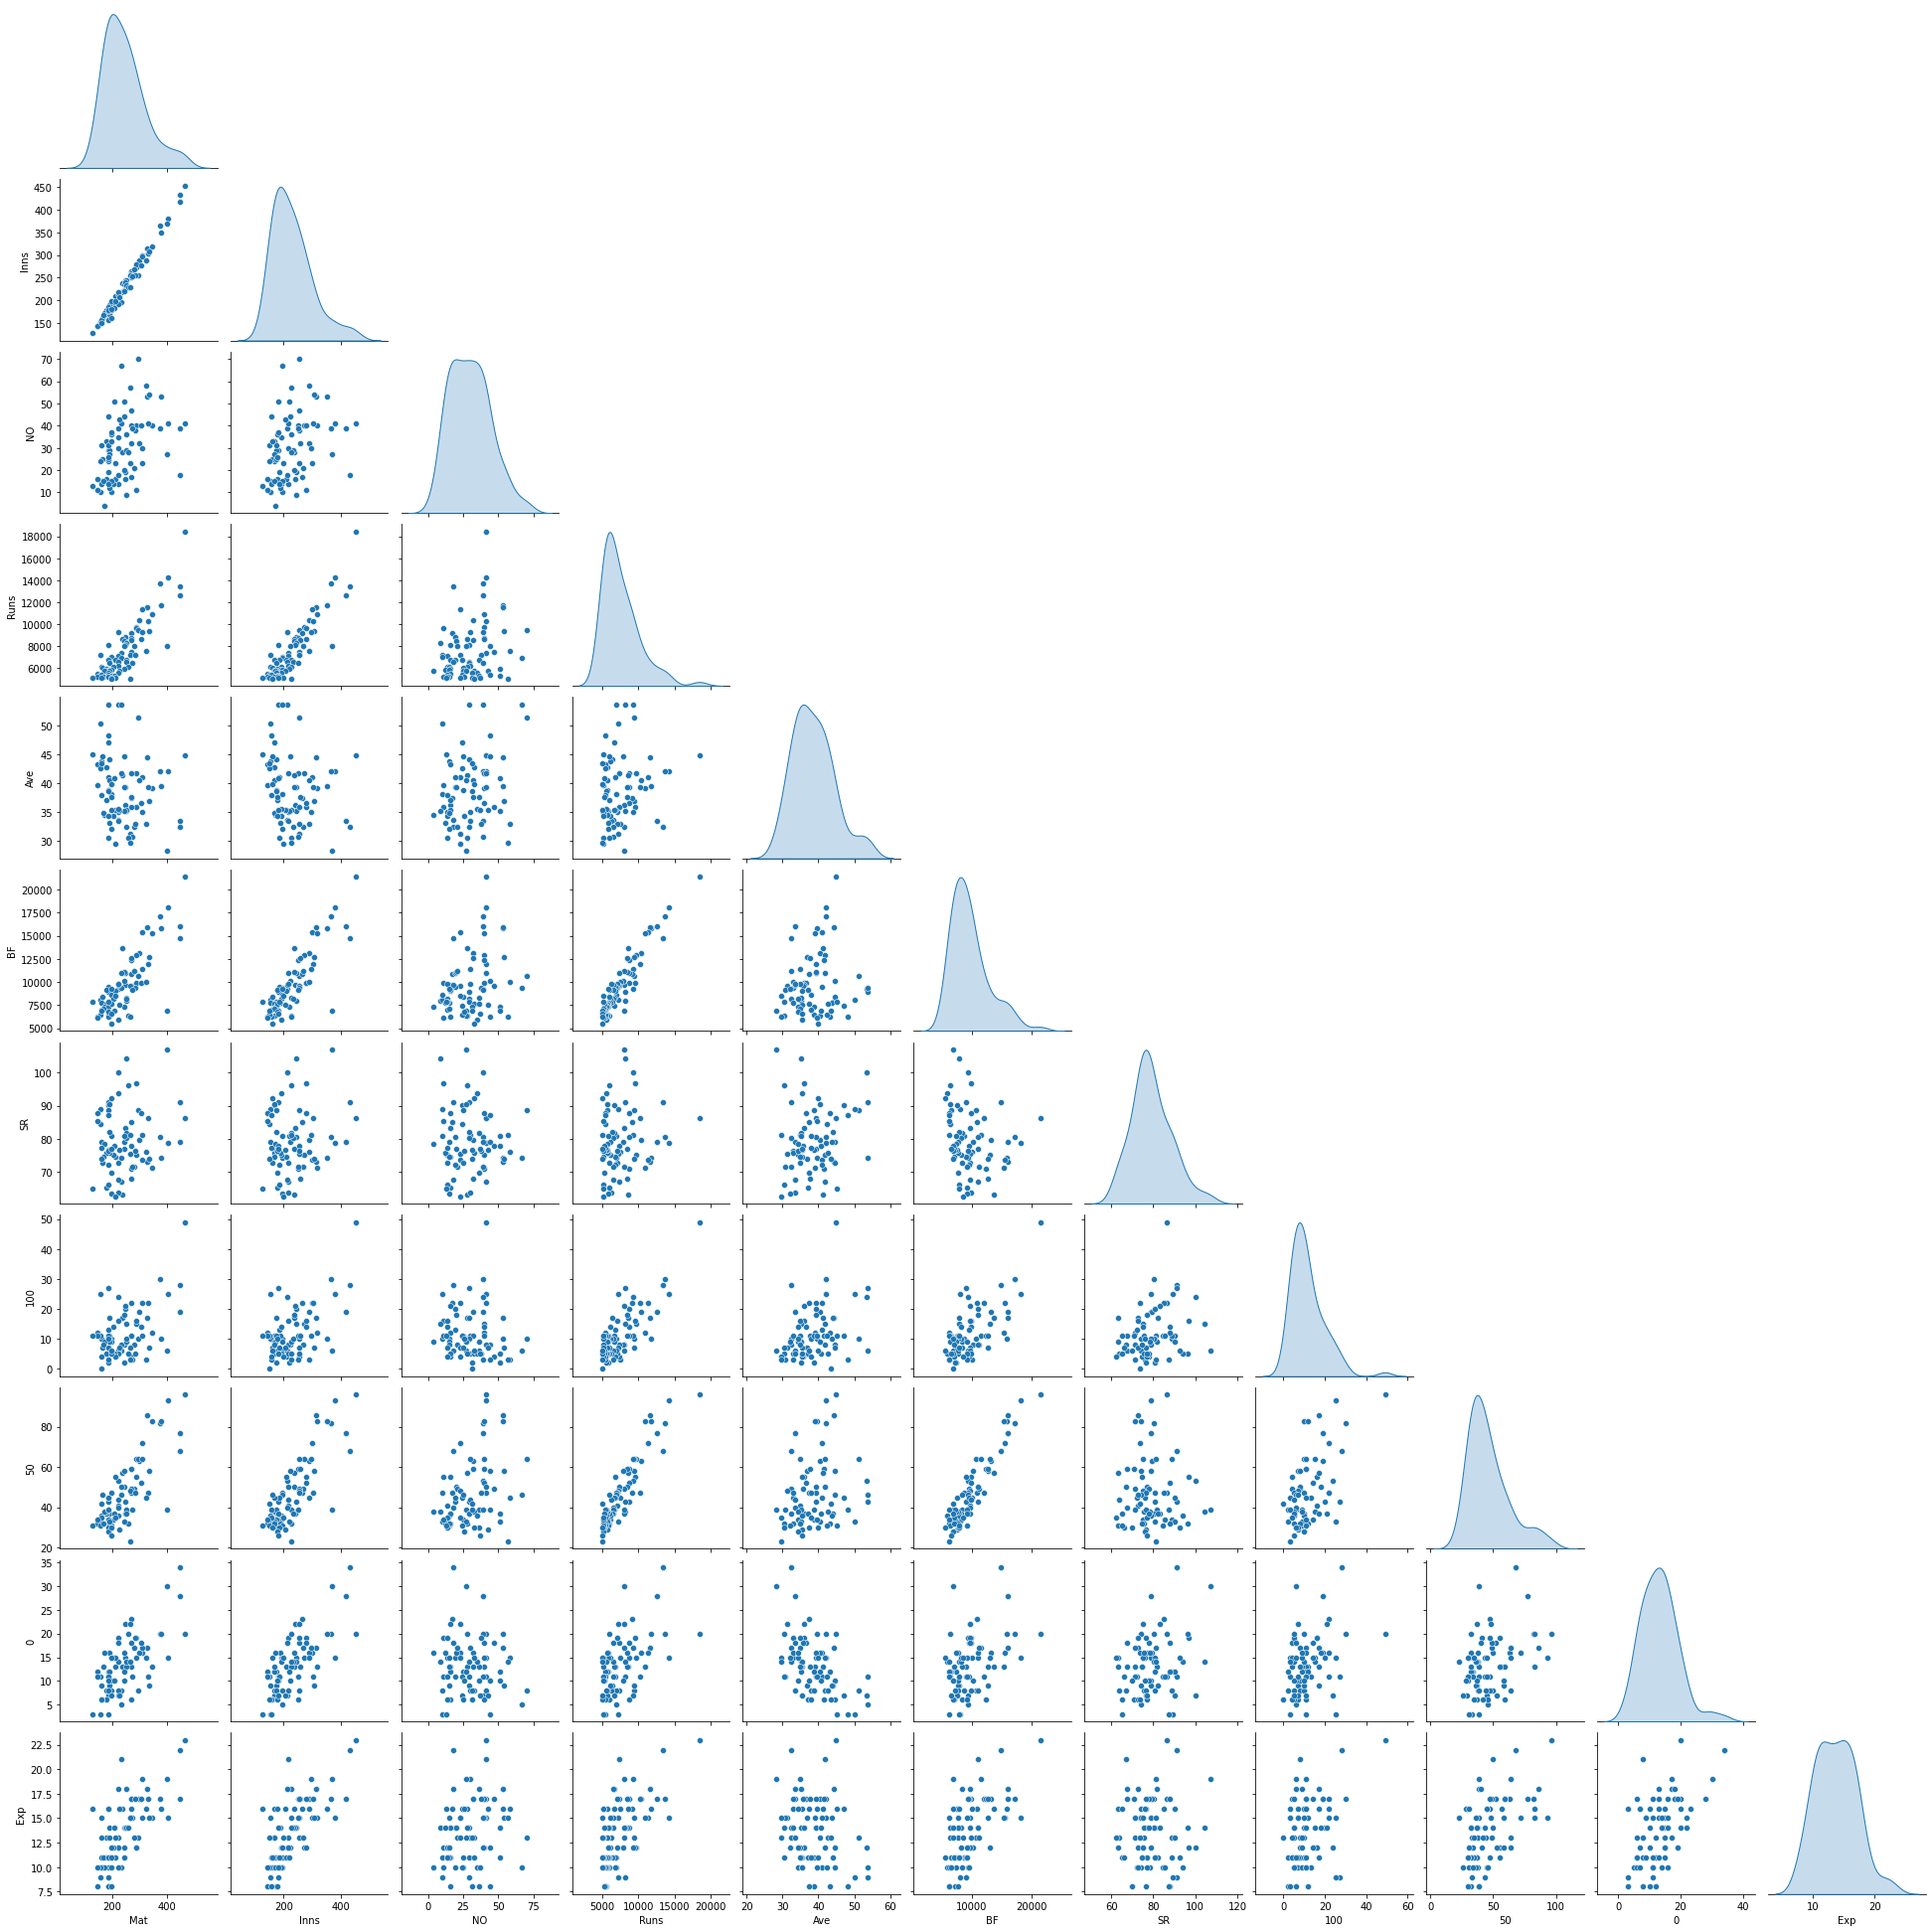

In [ ]:
## kde-pairplot
sns.pairplot(df,corner=True,diag_kind="kde")
plt.show()

## Outliers Analyzing

As mentioned in our question that we have to take two parameter strike rate and average score for our outliers

In [ ]:
mf.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,Exp
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.578187,9684.455696,79.195101,11.556962,46.443038,13.253165,13.746835
std,74.211716,70.321022,14.421710,2551.873313,5.781480,3193.835825,9.450137,8.092014,16.351701,5.925755,3.310699
min,128.000000,127.000000,4.000000,5080.000000,28.187600,5504.000000,62.535600,0.000000,23.000000,3.000000,8.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000,11.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000,14.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.659200,21367.000000,107.117400,49.000000,96.000000,34.000000,23.000000


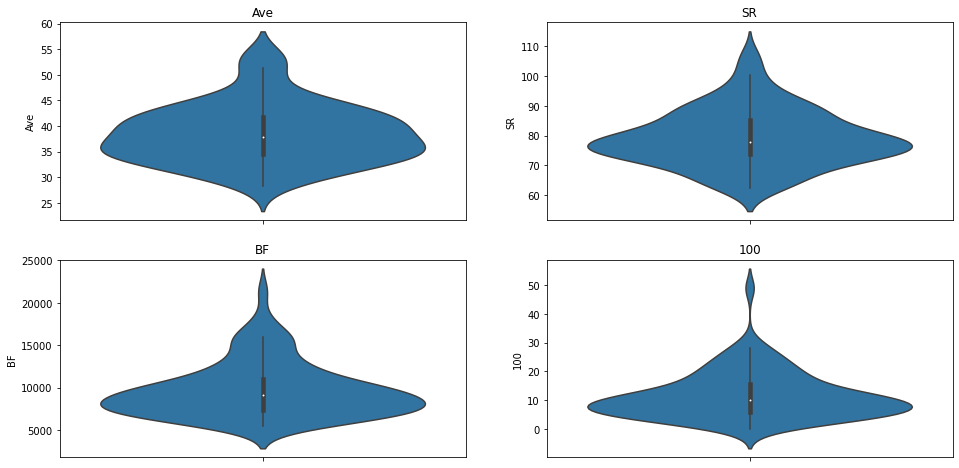

In [ ]:
f, axes = plt.subplots(2,2, figsize=(16, 8))

s=sns.violinplot(y=mf.Ave,ax=axes[0, 0])
axes[0, 0].set_title('Ave')
s=sns.violinplot(y=mf.SR,ax=axes[0, 1])
axes[0, 1].set_title('SR')
s=sns.violinplot(y=mf['100'],ax=axes[1, 1])
axes[1, 1].set_title('100')
s=sns.violinplot(y=mf.BF,ax=axes[1, 0])
axes[1, 0].set_title('BF')
plt.show()

C:\Users\sy430\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sy430\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sy430\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

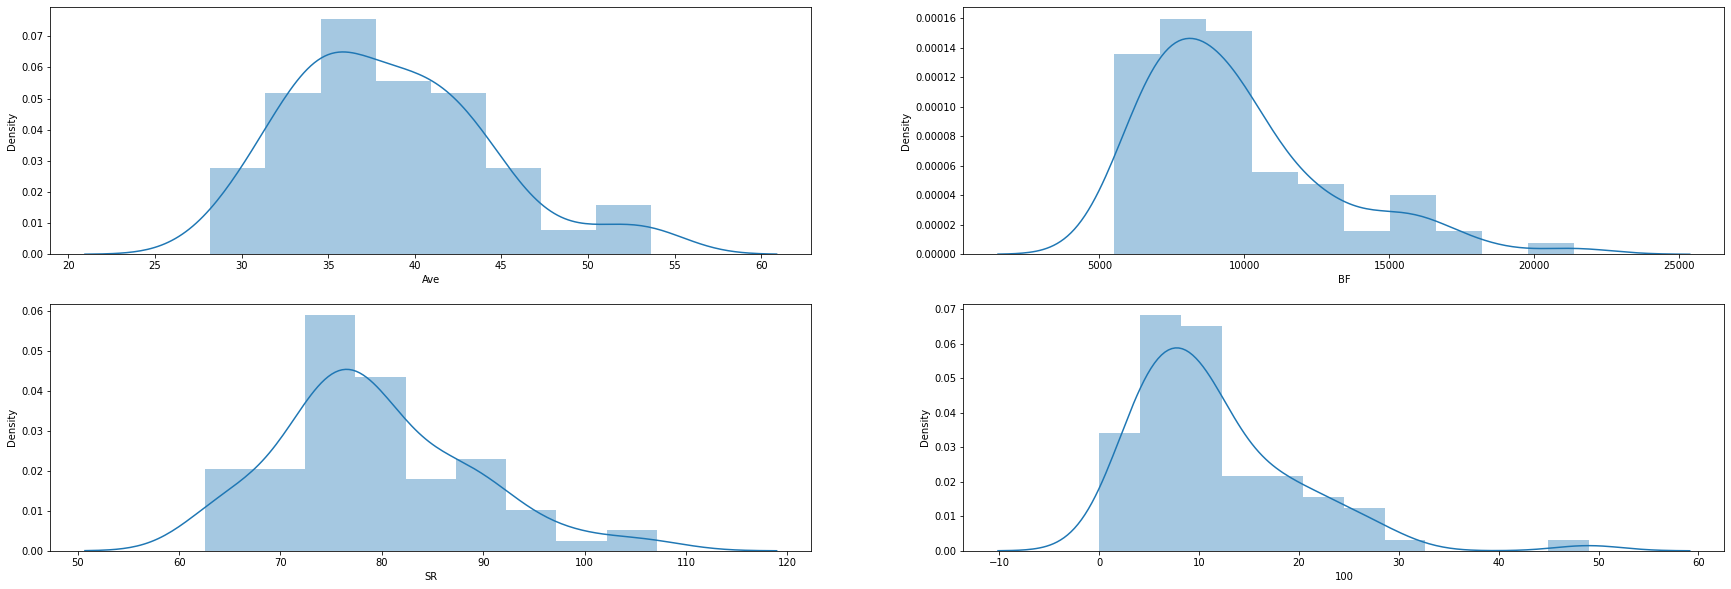

In [ ]:
plt.figure(figsize = (30,10))
features=[  'Ave', 'BF', 'SR', '100']
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

In [ ]:
Q3 = mf.Ave.quantile(0.99)
Q1 = mf.Ave.quantile(0.01)
mf['Ave'][mf['Ave']<=Q1]=Q1
mf['Ave'][mf['Ave']>=Q3]=Q3

C:\Users\sy430\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sy430\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
Q3 = mf.SR.quantile(0.99)
Q1 = mf.SR.quantile(0.01)
mf['SR'][mf['SR']<=Q1]=Q1mf['SR'][mf['SR']>=Q3]=Q3

C:\Users\sy430\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sy430\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


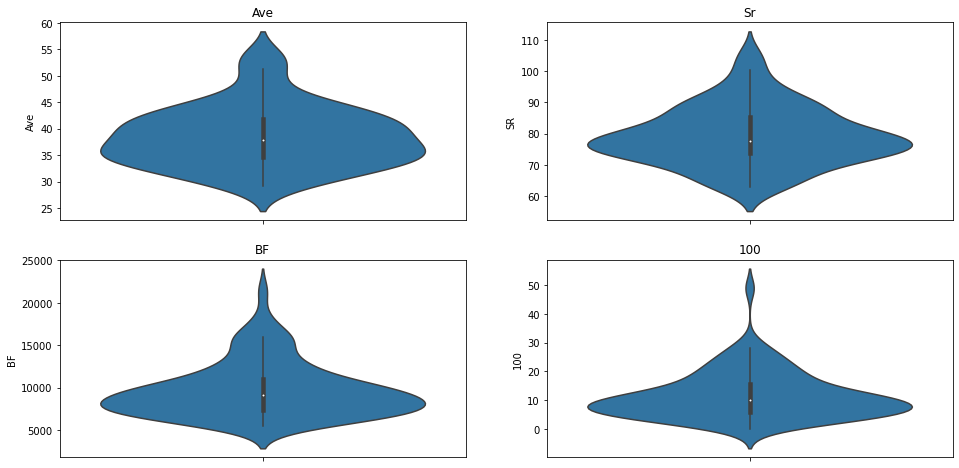

In [ ]:
f, axes = plt.subplots(2,2, figsize=(16, 8))
s=sns.violinplot(y=mf.Ave,ax=axes[0, 0])
axes[0, 0].set_title('Ave')
s=sns.violinplot(y=mf.SR,ax=axes[0, 1])
axes[0, 1].set_title('Sr')
s=sns.violinplot(y=mf['100'],ax=axes[1, 1])
axes[1, 1].set_title('100')
s=sns.violinplot(y=mf.BF,ax=axes[1, 0])
axes[1, 0].set_title('BF')

plt.show()

In [ ]:
# Dropping Player field as final dataframe will only contain data columns
mf_drop = mf.copy()
player = mf_drop.pop('Player')

In [ ]:
mf_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
#Dropping out useless data  

mf_drop.drop(['HS'], axis = 1, inplace = True)


## Scaling Features

In [ ]:
scaler = StandardScaler()
mf_scaled = scaler.fit_transform(mf_drop)
mf_scaled 

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.09076021e+00,  3.68121424e+00,
         7.58692670e-01,  4.65672622e+00,  3.05005720e+00,
         1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  5.92555340e-01,  2.63538469e+00,
        -3.36564450e-02,  1.67188751e+00,  2.86541772e+00,
         2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  6.01295777e-01,  2.31965067e+00,
         1.30833941e-01,  2.29372891e+00,  2.18840630e+00,
         1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00, -1.08910460e+00,  1.58829472e+00,
         1.29301765e+00,  2.04499235e+00,  1.32675540e+00,
         3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.25396797e-01,
         1.98442984e+00, -9.12547784e-01,  1.99635416e+00,
  

In [ ]:
mf_mf1 = pd.DataFrame(mf_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'Ave', 'BF', 'SR', '100','50', '0', 'Exp'])
mf_mf1.head()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.090760,3.681214,0.758693,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.592555,2.635385,-0.033656,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.601296,2.319651,0.130834,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,-1.089105,1.588295,1.293018,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.912548,1.996354,-0.022905,0.925678,1.880674,2.504502,0.988900


## Model Building

### K-means

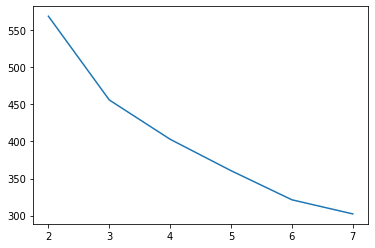

In [ ]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(mf_mf1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [ ]:
# K-means with k=4 clusters random State=100

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 100)
cluster.fit(mf_mf1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
# Cluster labels

cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 1, 0, 1, 1, 3, 0, 3,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3])

In [ ]:
# Assign the label

mf['Cluster_Id'] = cluster.labels_
mf.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2


C:\Users\sy430\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


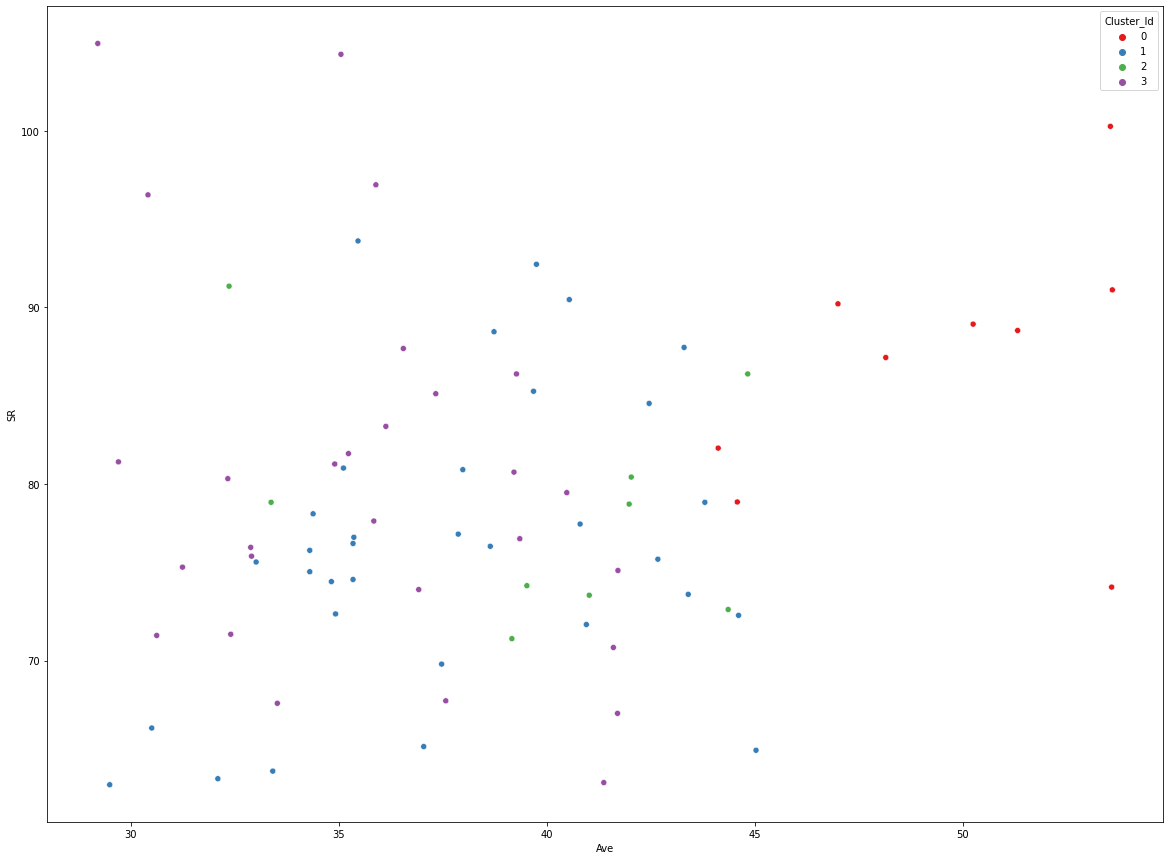

In [ ]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
sns.scatterplot(x = 'Ave', y = 'SR',hue='Cluster_Id', data = mf,legend='full',palette="Set1")
plt.subplot(1,1,1)
plt.show()

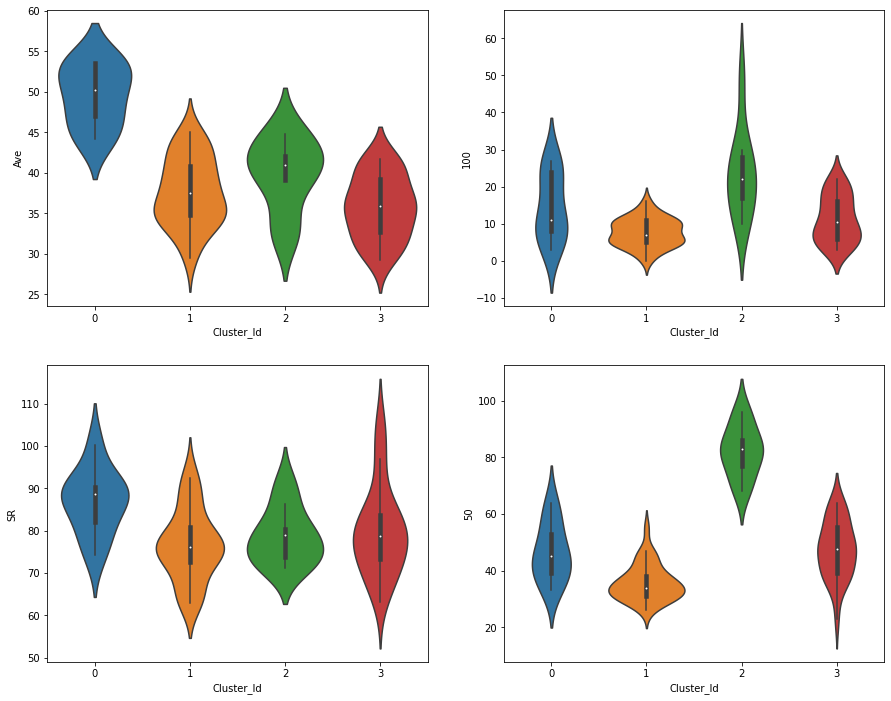

In [ ]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'Ave', data = mf,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'SR', data = mf,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = '100', data=mf,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = '50', data=mf,ax=axes[1][1])

plt.show()

In [ ]:
mf[['Ave','SR','100','50','Cluster_Id']].groupby('Cluster_Id').mean()


,Ave,SR,100,50
Cluster_Id,,,,
0,49.571936,86.834444,14.555556,46.444444
1,37.653030,76.528425,7.696970,35.787879
2,39.847778,78.634444,23.555556,82.222222
3,35.760838,80.000472,11.285714,47.500000
